In [ ]:
# prompt: create a pandas dataframe to mock up covid testing results. create a column for test result (positive or negative), and columns for high_risk_occupation, high_risk_interaction, temperature, cough (none, mild, medium, severe), loss_of_taste (true/false), loss_of_smell (true/false).  Build mild correlation for high_risk_occupation, high_risk_interaction, temperature, cough, medium for loss_of_taste

import pandas as pd
import numpy as np

# Create a DataFrame with 1000 rows
n_rows = 1000
df = pd.DataFrame({
    'test_result': np.random.choice(['positive', 'negative'], size=n_rows, p=[0.05, 0.95]),
    'high_risk_occupation': np.random.choice([True, False], size=n_rows, p=[0.1, 0.9]),
    'high_risk_interaction': np.random.choice([True, False], size=n_rows, p=[0.15, 0.85]),
    'temperature': np.random.normal(loc=98.6, scale=1, size=n_rows),
    'cough': np.random.choice(['none', 'mild', 'medium', 'severe'], size=n_rows, p=[0.7, 0.2, 0.08, 0.02]),
    'loss_of_taste': np.random.choice([True, False], size=n_rows, p=[0.1, 0.9]),
    'loss_of_smell': np.random.choice([True, False], size=n_rows, p=[0.05, 0.95])
})

# Introduce mild correlation between test result and high-risk factors
df.loc[df['test_result'] == 'positive', 'high_risk_occupation'] = np.random.choice([True, False], size=df.loc[df['test_result'] == 'positive'].shape[0], p=[0.3, 0.7])
df.loc[df['test_result'] == 'positive', 'high_risk_interaction'] = np.random.choice([True, False], size=df.loc[df['test_result'] == 'positive'].shape[0], p=[0.4, 0.6])
df.loc[df['test_result'] == 'positive', 'temperature'] = np.random.normal(loc=100.4, scale=1, size=df.loc[df['test_result'] == 'positive'].shape[0])
df.loc[df['test_result'] == 'positive', 'cough'] = np.random.choice(['none', 'mild', 'medium', 'severe'], size=df.loc[df['test_result'] == 'positive'].shape[0], p=[0.3, 0.4, 0.2, 0.1])

# Introduce medium correlation between test result and loss_of_taste
df.loc[df['test_result'] == 'positive', 'loss_of_taste'] = np.random.choice([True, False], size=df.loc[df['test_result'] == 'positive'].shape[0], p=[0.5, 0.5])

print(df.head())


In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=b1bd710acd2d7f72a5b44a2344cee46ffcbfd4ecff530191631c15ee1a58a979
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
df

,test_result,high_risk_occupation,high_risk_interaction,temperature,cough,loss_of_taste,loss_of_smell
0,negative,True,True,100.291359,none,True,True
1,negative,True,True,102.228191,none,False,False
2,positive,True,False,96.352032,medium,False,True
3,negative,False,False,98.065490,severe,True,True
4,positive,False,True,101.466826,medium,True,True
...,...,...,...,...,...,...,...
95,positive,True,False,96.339497,medium,False,True
96,positive,False,False,101.294827,mild,False,True
97,positive,False,True,96.668594,mild,True,False
98,positive,True,False,97.566418,severe,False,False


In [ ]:
# prompt: Using dataframe df: write a SQL query to create a table showing how many positive and negative tests there were by loss_of_smell. use pandasql to run it.

from pandasql import sqldf

# Define the query
query = """
SELECT
  loss_of_smell,
  test_result,
  COUNT(*) AS count
FROM df
GROUP BY
  loss_of_smell,
  test_result;
"""

# Run the query
result = sqldf(query)

# Print or use the result
print(result)


   loss_of_smell test_result  count
0              0    negative     19
1              0    positive     25
2              1    negative     23
3              1    positive     33


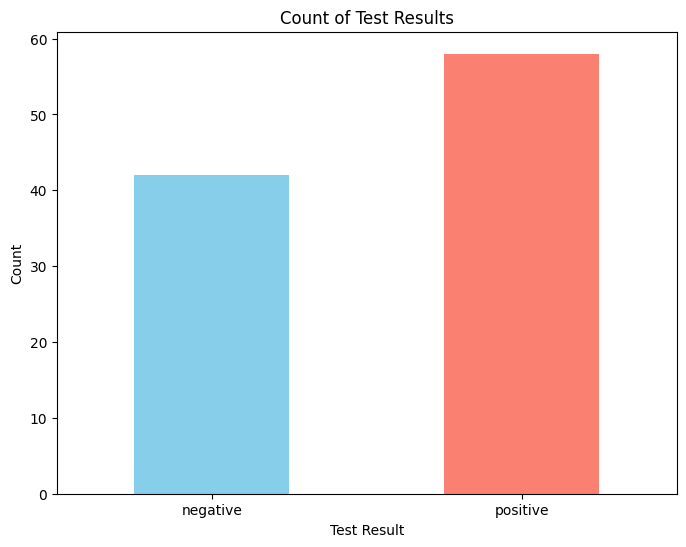

In [ ]:
# prompt: for the result dataframe, create a bar chart showing the count for each test result

import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame with 'test_result' and 'count' columns

# Group the data by test result and sum the counts
result_grouped = result.groupby('test_result')['count'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
result_grouped.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.title('Count of Test Results')
plt.xticks(rotation=0)
plt.show()
